In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv('sexist_data_final_train.csv')

In [3]:
df_train.head()

,Unnamed: 0,id,text,numeric_labels,sexist,predicted_label_1,correct_yx,predicted_label_2,predicted_label_3,predicted_label_4,predicted_label_5,average_pvi,average_el2n,average_vog,misclassification_number
0,0,2651,SIIIIGH http://t.co/BpJX5JwhlH,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.134662,0.043008,-0.001590,0
1,1,6089,I really dislike working with undergrads in la...,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.050947,0.119459,-0.001476,0
2,2,9786,"So calling qualified hires ""tokens"" b/c it's n...",0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.065549,0.104858,-0.000092,0
3,3,10635,Noooooo #mkr whyyyyy,0,False,LABEL_0,True,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.136266,0.041448,-0.001700,0
4,4,9749,I don't know ANY genuine female nerds... who w...,0,False,LABEL_0,True,LABEL_0,LABEL_1,LABEL_0,LABEL_0,-0.418783,0.439067,0.002268,1


In [4]:
df_train_sexist = df_train[df_train['sexist'] == True].reset_index(drop = True)

In [5]:
sexist_roots = pd.read_csv('sexist_roots.csv')

In [6]:
sexist_roots = sexist_roots.drop([5])

In [7]:
sexist_roots

,Unnamed: 0,Root,Examples,MI,Count,Sexist,Non-Sexist,Majority label idx,Majority label,% majority,Support count,Counter count
0,0,29,"a girl, her husband, a lady, the home, a femal...",0.004500,327.0,327.0,0.0,0,Sexist,0.996960,327.0,0.0
1,1,15,"than men, than women, to men, for sex, by men,...",0.002049,163.0,163.0,0.0,0,Sexist,0.993939,163.0,0.0
2,2,88,"female, women, girl, girls, career, proper, ph...",0.002049,163.0,163.0,0.0,0,Sexist,0.993939,163.0,0.0
3,3,2,"take care, be permitted, being leered, truly [...",0.001441,121.0,121.0,0.0,0,Sexist,0.991870,121.0,0.0
4,4,88,"sexual, male, [UNK], football, most, instant, ...",0.001400,155.0,153.0,2.0,0,Sexist,0.980892,153.0,2.0
6,6,8,"women should, men are, girls should, men shoul...",0.001114,98.0,98.0,0.0,0,Sexist,0.990000,98.0,0.0
7,7,82,"man, woman, women, guy, children, family, boy,...",0.000753,72.0,72.0,0.0,0,Sexist,0.986486,72.0,0.0
8,8,82,"girl, husband, wife, female, lady, home, men, ...",0.000672,66.0,66.0,0.0,0,Sexist,0.985294,66.0,0.0
9,9,41,"football, wife, responsibility, ghostbusters, ...",0.000591,60.0,60.0,0.0,0,Sexist,0.983871,60.0,0.0


In [8]:
def get_filtered_data(data, roots):
    final_ids = []
    for i, row in roots.iterrows():
        ids = []
        patterns = [pattern.strip() for pattern in row['Examples'].split(',')]
        for pattern in patterns: 
            if '[UNK]' in pattern:
                continue
            pattern = fr'{pattern}'
            data_ids = data[data['text'].str.contains(pattern, case = False, regex = True)]['id'].to_list()
            ids.append(data_ids)
        ids = list(set().union(*ids))
        final_ids.append(ids)
    final_ids = list(set().union(*final_ids))
    #print(final_ids)
    return final_ids

In [9]:
final_ids = get_filtered_data(df_train_sexist, sexist_roots)

In [10]:
len(final_ids)

1230

In [25]:
df_train_ns = df_train[df_train['sexist'] == False].reset_index(drop = True)

In [26]:
final_ids_ns = get_filtered_data(df_train_ns, sexist_roots)

In [28]:
len(final_ids_ns)

4987

In [30]:
df_sexist_non_sexist = df_train_ns[df_train_ns['id'].isin(final_ids_ns)].reset_index(drop = True)
df_sexist_non_sexist.to_csv('ns_data_shared_shotcuts.csv', index = False)

In [11]:
sexist_data_shortcuts = df_train_sexist[df_train_sexist['id'].isin(final_ids)].reset_index(drop = True)

In [31]:
df_sexist_non_sexist[df_sexist_non_sexist['misclassification_number'] > 4]

,Unnamed: 0,id,text,numeric_labels,sexist,predicted_label_1,correct_yx,predicted_label_2,predicted_label_3,predicted_label_4,predicted_label_5,average_pvi,average_el2n,average_vog,misclassification_number
75,144,2959,"If a husband and wife both work full time, th...",0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.010650,0.792905,-0.002897,5
82,165,12580,"Under modern economic conditions, involving wo...",0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.438235,0.948374,-0.002643,5
83,166,916,"In a relationship, the woman as well as the ma...",0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.414521,0.941717,-0.002998,5
172,320,2514,Women often miss out on good jobs due to discr...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.578548,0.992413,-0.003618,5
189,352,13316,A woman should be free as a man to propose mar...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.554196,0.987477,-0.003476,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,9130,12472,Most women are good at interpreting if remarks...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.572573,0.990755,-0.003501,5
4790,9152,5602,Women can be concerned with their duties of ch...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.387847,0.934883,-0.003320,5
4906,9379,4490,Men are just as easily influenced by others as...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.597844,0.998519,-0.003283,5
4970,9503,2747,It is not enough for a woman to be successful ...,0,False,LABEL_1,False,LABEL_1,LABEL_1,LABEL_1,LABEL_1,-1.359392,0.924885,-0.002961,5


In [13]:
sexist_data_shortcuts.to_csv('sexist_data_shortcuts.csv')

In [17]:
incorrect = sexist_data_shortcuts[sexist_data_shortcuts['misclassification_number'] >=4][['id', 'text', 'average_pvi', 'average_el2n']]

In [15]:
def plot_biases(sexist_data):
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 6))
    fig.tight_layout()
    bins = np.arange(-2, 3, 0.3)
    df_sexist = sexist_data[sexist_data['numeric_labels'] == 1].reset_index(drop = True)
    correct = df_sexist[df_sexist['misclassification_number'] < 4].reset_index(drop = True)
    incorrect = df_sexist[df_sexist['misclassification_number']  >= 4].reset_index(drop = True)
    correct_pvi, incorrect_pvi = correct['average_pvi'], incorrect['average_pvi']
    correct_el2n, incorrect_el2n = correct['average_el2n'], incorrect['average_el2n']
    correct_vog, incorrect_vog = correct['average_vog'], incorrect['average_vog']
    ax1.hist(data = correct, x = 'average_pvi', weights=np.ones_like(correct_pvi)/len(df_sexist), label=f'correct',
           bins = bins, alpha=0.4, color='tab:blue')
    ax1.hist(data = incorrect, x = 'average_pvi', weights=np.ones_like(incorrect_pvi)/len(df_sexist), label=f'incorrect',
           bins = bins, alpha=0.4, color='tab:red')
    ax1.legend(loc = 'best',fontsize = 10)
    ax2.hist(correct_el2n, weights=np.ones_like(correct_el2n)/len(df_sexist), label=f'correct', 
            bins = bins, alpha=0.4, color='tab:blue')
    ax2.hist(incorrect_el2n, weights=np.ones_like(incorrect_el2n)/len(df_sexist), label=f'incorrect',
            bins = bins, alpha=0.4, color='tab:red')
    ax2.legend(loc = 'best',fontsize = 10)
    #ax3.hist(correct_vog, weights=np.ones_like(correct_vog)/len(correct_vog), label=f'correct',
    #        bins = np.arange(-0.5, 0.8, 0.1), alpha=0.4, color='tab:blue')
    #ax3.hist(incorrect_vog, weights=np.ones_like(incorrect_vog)/len(incorrect_vog), label=f'incorrect',
    #       bins = np.arange(-0.5, 0.8, 0.1), alpha=0.4, color='tab:red')
    #ax3.legend(loc = 'best',fontsize = 10)
    ax1.vlines(df_sexist['average_pvi'].mean(), 0, 0.5, linestyles='dashed', color='black')
    ax1.set_ylabel('Proportion of Examples')
    ax1.set_xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=11)
    ax2.set_xlabel('EL2N (higher $\leftrightarrow$ harder)', fontsize=11)
    ax2.vlines(df_sexist['average_el2n'].mean(), 0, 0.5, linestyles='dashed', color='black')
    #ax3.set_ylim([0, 0.9])
    #ax3.set_xlabel('VOG (higher $\leftrightarrow$ harder)', fontsize=11)
    #ax3.vlines(df_sexist['average_vog'].mean(), 0, 0.2, linestyles='dashed', color='black')
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    ax1.set_ylim(0, 0.5)
    ax2.set_ylim(0, 0.5)
    #ax3.grid(axis='x')
    ax1.text(df_sexist['average_pvi'].mean(), 0.51, 'Mean PVI: {:.2f}'.format(df_sexist['average_pvi'].mean()), ha='center', va='bottom')
    ax2.text(df_sexist['average_el2n'].mean(), 0.51, 'Mean EL2N: {:.2f}'.format(df_sexist['average_el2n'].mean()), ha='center', va='bottom')
    
    #ax1.tick_params(axis="x", labelsize=13) 
    #ax2.tick_params(axis="x", labelsize=13) 
    
    plt.savefig('biases_sexist.pdf',bbox_inches = "tight")
    plt.show()

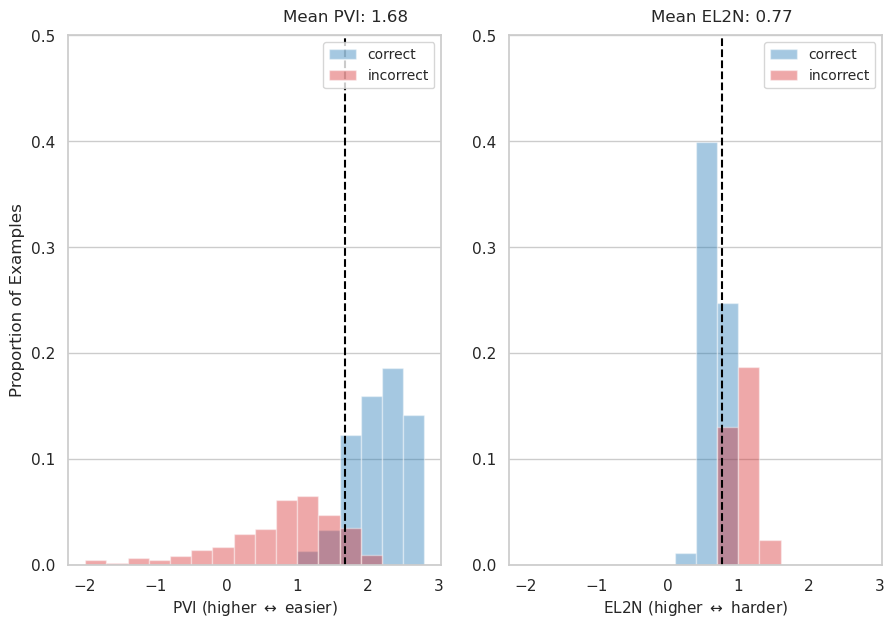

In [16]:
plot_biases(sexist_data_shortcuts)

In [18]:
correct = sexist_data_shortcuts[sexist_data_shortcuts['misclassification_number'] < 4][['id', 'text', 'average_pvi', 'average_el2n']]

In [19]:
correct['average_pvi'].mean()

2.149738571860162

In [20]:
correct['average_el2n'].mean()

0.6304108864216157

In [21]:
incorrect['average_pvi'].mean()

0.7780721873797095

In [22]:
incorrect['average_el2n'].mean()

1.0524463540741373

In [23]:
correct.shape

(810, 4)

In [24]:
incorrect.shape

(420, 4)

In [56]:
from scipy.stats import mannwhitneyu

In [57]:
avg_pvi_correct = correct['average_pvi'].to_list()
avg_pvi_incorrect = incorrect['average_pvi'].to_list()

In [64]:
mannwhitneyu(avg_pvi_correct, avg_pvi_incorrect, alternative = 'greater')

MannwhitneyuResult(statistic=163101.0, pvalue=4.954059621941887e-107)

In [65]:
avg_el2n_correct = correct['average_el2n'].to_list()
avg_el2n_incorrect = incorrect['average_pvi'].to_list()

In [70]:
mannwhitneyu(avg_el2n_correct, avg_el2n_incorrect, alternative = 'less')

MannwhitneyuResult(statistic=45706.0, pvalue=1.234510140368504e-27)

In [72]:
sexist_data_shortcuts['type'] = sexist_data_shortcuts['misclassification_number'].apply(lambda x: 'incorrect' if x >= 4 else 'correct')

In [73]:
sexist_data_shortcuts

,Unnamed: 0,id,text,numeric_labels,sexist,predicted_label_1,correct_yx,predicted_label_2,predicted_label_3,predicted_label_4,predicted_label_5,average_pvi,average_el2n,average_vog,misclassification_number,type
0,9,12144,FETISHIZATION ALERT MENTION3680 it's time for ...,1,True,LABEL_0,False,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.486814,1.155221,0.008321,5,incorrect
1,11,2110,MENTION3181 Real women also have a good man at...,1,True,LABEL_1,True,LABEL_1,LABEL_1,LABEL_0,LABEL_0,1.814251,0.761998,0.005595,2,correct
2,13,1660,A true gentleman should not invite a young lad...,1,True,LABEL_1,True,LABEL_1,LABEL_1,LABEL_1,LABEL_1,2.341039,0.575969,-0.001070,0,correct
3,28,4246,RT MENTION837 Why do girls think it's an achie...,1,True,LABEL_0,False,LABEL_1,LABEL_1,LABEL_0,LABEL_0,1.406596,0.862026,0.006346,3,correct
4,39,12565,I just don't find it right when girls nowadays...,1,True,LABEL_0,False,LABEL_1,LABEL_1,LABEL_0,LABEL_0,1.685716,0.803912,-0.000096,3,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,9519,2433,Women are more devout individuals than men are,1,True,LABEL_1,True,LABEL_1,LABEL_1,LABEL_1,LABEL_1,2.623112,0.397988,-0.002302,0,correct
906,9525,11114,I don't mind how some women still expect men t...,1,True,LABEL_1,True,LABEL_1,LABEL_1,LABEL_0,LABEL_0,1.951931,0.709721,-0.001774,2,correct
907,9530,13530,Real women don't take time off to whine. Unlik...,1,True,LABEL_0,False,LABEL_0,LABEL_0,LABEL_0,LABEL_0,0.770645,1.083139,0.000947,5,incorrect
908,9532,6267,The women’s movement is too radical and extrem...,1,True,LABEL_1,True,LABEL_1,LABEL_0,LABEL_1,LABEL_1,2.329935,0.575341,-0.001980,1,correct


In [89]:
sexist_data_shortcuts[sexist_data_shortcuts['type'] == 'incorrect'].shape

(260, 16)

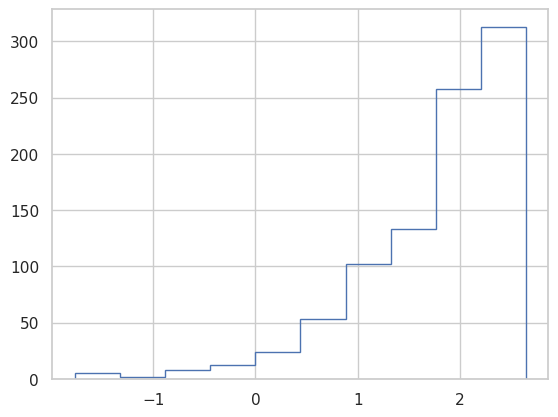

In [95]:
counts, bins = np.histogram(sexist_data_shortcuts['average_pvi'])
plt.stairs(counts, bins)